# Ontario Research Lab Landscape Analysis
This notebook analyzes the distribution of 431 research facilities scraped from the CFI Navigator. 
Explore top institutions, geographic hubs, and research sectors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set professional visual style
sns.set_theme(style="whitegrid")

# Load geocoded data
df = pd.read_csv("data/ON_labs_geocoded.csv")

# Extract City from Location
df['City'] = df['Location'].apply(lambda x: str(x).split(',')[1].strip() if len(str(x).split(',')) > 1 else "Unknown")
df.head()

,Lab Name,Sectors,Location,Institution,Latitude,Longitude,City
0,0.9 m Wind Tunnel,"Aerospace and satellites, Automotive, Transpor...","1200 Montreal Road, Ottawa, ON, K1A 0R6, Canada",National Research Council Canada,45.446001,-75.619556,Ottawa
1,1.5 m Trisonic Wind Tunnel,"Aerospace and satellites, Defence and security...","655 Levy Private, Ottawa, ON, K1V 2B1, Canada",National Research Council Canada,45.328406,-75.664292,Ottawa
2,2 m x 3 m Wind Tunnel,"Aerospace and satellites, Automotive, Construc...","1200 Montreal Road, Ottawa, ON, K1A 0R6, Canada",National Research Council Canada,45.446001,-75.619556,Ottawa
3,3 m x 6 m Icing Wind Tunnel,"Aerospace and satellites, Automotive, Defence ...","1200 Montreal Road, Ottawa, ON, K1A 0R6, Canada",National Research Council Canada,45.446001,-75.619556,Ottawa
4,3D Earth Imaging and Modelling Lab,"Energy, Environmental technologies and related...","601 Booth Street, Ottawa, ON, K1A 0E8, Canada",Natural Resources Canada,45.401923,-75.705570,Ottawa


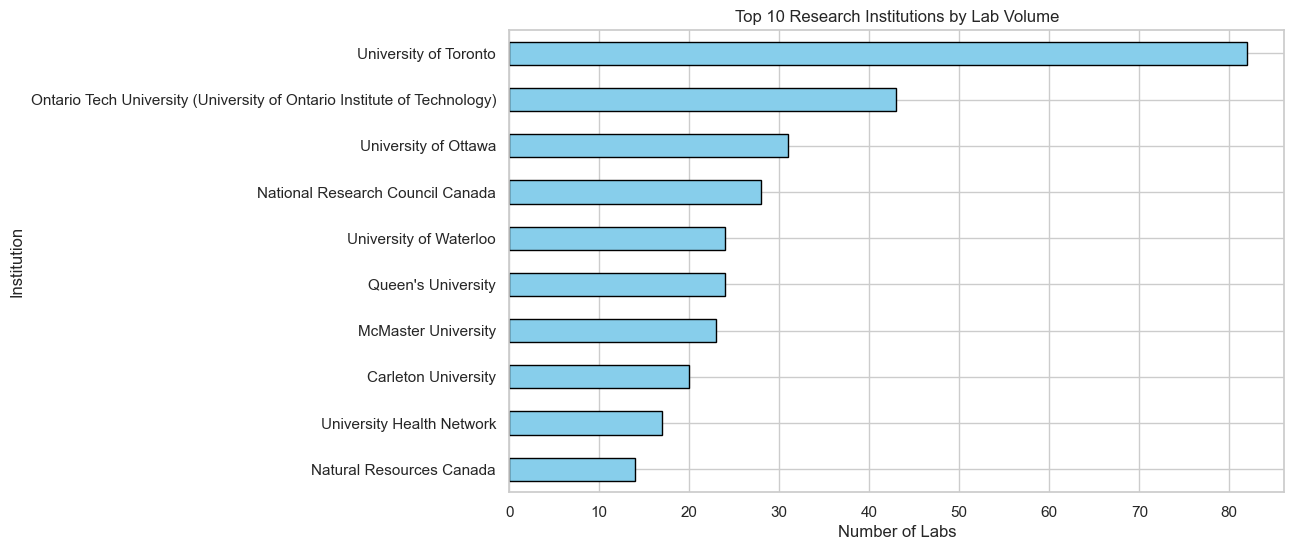

In [2]:
plt.figure(figsize=(10, 6))
top_inst = df['Institution'].value_counts().head(10).sort_values(ascending=True)
top_inst.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Research Institutions by Lab Volume')
plt.xlabel('Number of Labs')
plt.show()

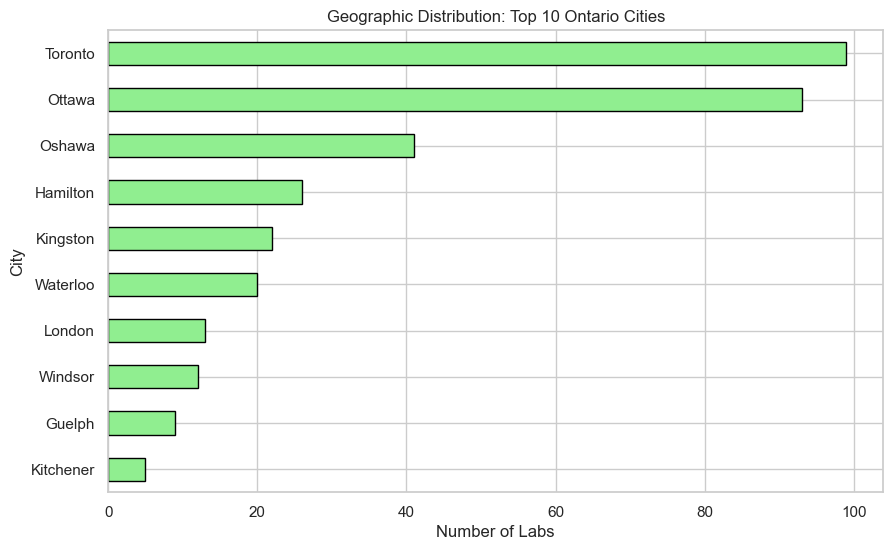

In [3]:
plt.figure(figsize=(10, 6))
top_cities = df['City'].value_counts().head(10).sort_values(ascending=True)
top_cities.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Geographic Distribution: Top 10 Ontario Cities')
plt.xlabel('Number of Labs')
plt.show()

C:\Users\chans\AppData\Local\Temp\ipykernel_3120\3028357904.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


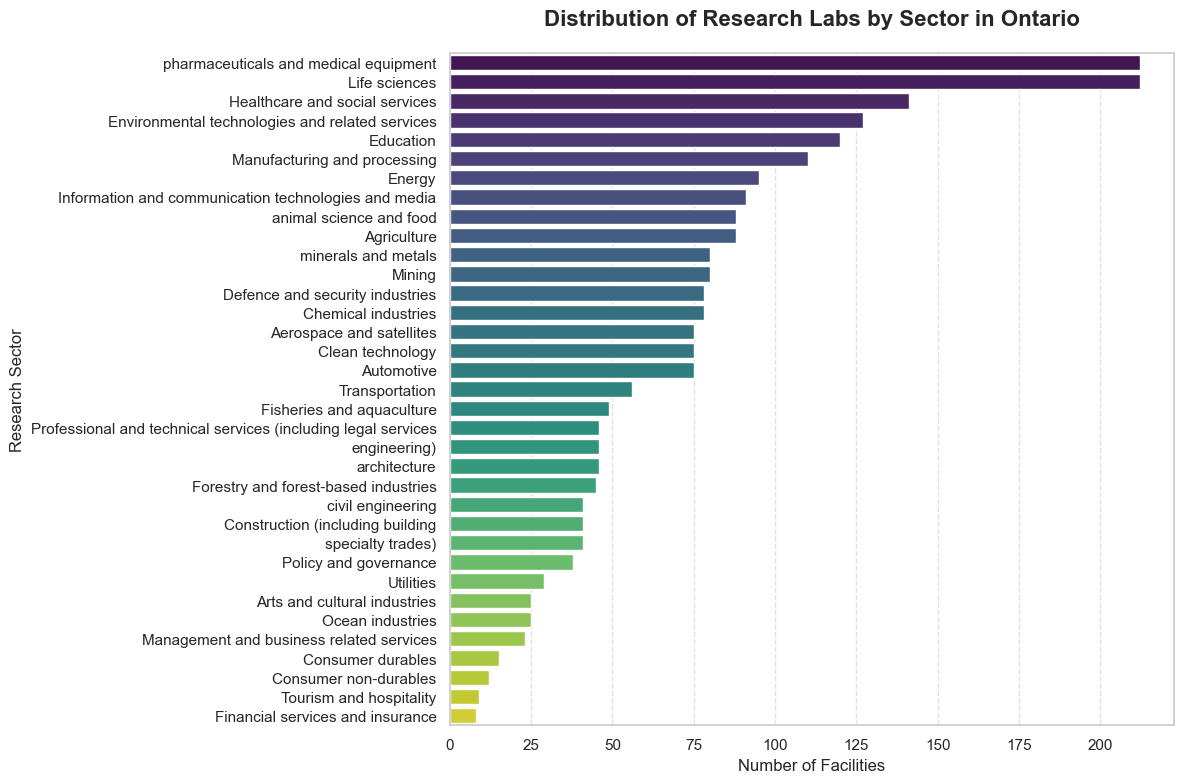

Total Labs per Sector:
Sectors
pharmaceuticals and medical equipment                            212
Life sciences                                                    212
Healthcare and social services                                   141
Environmental technologies and related services                  127
Education                                                        120
Manufacturing and processing                                     110
Energy                                                            95
Information and communication technologies and media              91
animal science and food                                           88
Agriculture                                                       88
minerals and metals                                               80
Mining                                                            80
Defence and security industries                                   78
Chemical industries                                               78
Aer

In [4]:
# Split the comma-separated strings into lists and 'explode' them into individual rows
sector_counts = df['Sectors'].str.split(', ').explode().value_counts()

# Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(
    x=sector_counts.values, 
    y=sector_counts.index, 
    palette="viridis"
)

# Add labels and titles
plt.title('Distribution of Research Labs by Sector in Ontario', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Facilities', fontsize=12)
plt.ylabel('Research Sector', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

# Print the raw numbers for reference
print("Total Labs per Sector:")
print(sector_counts)

In [5]:
import folium
import pandas as pd

# Load the geocoded data from your data folder
df_map = pd.read_csv("data/ON_labs_geocoded.csv")

# Remove any rows that failed to geocode (missing coordinates)
df_map = df_map.dropna(subset=['Latitude', 'Longitude'])

# Initialize the map centered on the average location of all labs
m = folium.Map(
    location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()], 
    zoom_start=6,
    tiles='CartoDB positron' # A clean, professional map style
)

# Add interactive markers to the map
for _, row in df_map.iterrows():
    # Define the content of the popup (appears on click)
    popup_text = f"<b>Lab:</b> {row['Lab Name']}<br><b>Institution:</b> {row['Institution']}"
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=row['Lab Name'] # Appears on hover
    ).add_to(m)

# Display the map directly in the notebook output
m